In [1]:
import os
from os.path import expanduser
import socket
import sys


# BELOW IS SYSTEM/PATH CONFIGURATION #
my_home = expanduser("~")
running_system = socket.gethostname()
# Configure machine's names here #
systemHLRN = 'blogin1'
systemLOCAL = 'Laurents-MacBook-Pro.local'
my_home = expanduser("~")
# Define local pass #
if running_system == systemLOCAL:
    print "computer = ", running_system
    wd_path = os.path.join(my_home,"Documents","projects", "awi-models")
elif running_system[0] == "b" or running_system == systemHLRN:
    print "computer = ", running_system
    wd_path = os.path.join(my_home,"awi-models")
else:
    print 'please configure your local machine : type socket.gethostname()'
print "working directory set to", wd_path
os.chdir(wd_path)
sys.path.append("codes/modules")
#########################################
# APR = 

computer =  bfn1005
working directory set to /home/hbkoziel/awi-models


In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from pylab import *
from load_mesh_data_new import *
import numpy as np
import datetime as dt
from PiecewiseNorm import PiecewiseNorm
from netCDF4 import Dataset
import colormaps as cmaps
from matplotlib.colors import ListedColormap

In [3]:
# PLOT CONFIGURATION #

# load colormaps #
cmap = plt.get_cmap('RdBu_r')
# figure export 
export_plot = True
# figure export definition
dpicnt=150
# choose simulation
runid='Arc12'
# choose date
first_year = 2000
last_year  = 2015
years      = np.arange(first_year,last_year+1,1)
months =np.linspace(0,11,12).astype(int)
# choose depth
get3d = True

########################

# AUTOMATIC DEFINITION OF PATHS
resultpath = '/scratch/usr/hbkvsk12/hlrn3_work2/results/'+runid+'/Oldfiles/'
savepath    = wd_path+'/figures/'+runid+'/'
meshpath    = wd_path+'/data/mesh/meshArc4.5/'

# Create figure directory if it does not exist
if os.path.exists(savepath) == False:
    try:
        os.mkdir(savepath)
        print ("Creation of the directory %s successfull" % savepath)
    except OSError:
        print ("Creation of the directory %s failed" % savepath)
else:
    print ("directory %s already existing" % savepath)

directory /home/hbkoziel/awi-models/figures/Arc12/ already existing


In [4]:
mesh = fesom_mesh(meshpath, get3d = get3d)
#mesh = load_mesh(meshpath)

Load 2d part of the grid in 3 second(s)
Load 3d part of the grid in 33 seconds


In [5]:
def dens0(T,S):
    T68 = T * 1.00024
    a0,a1,a2,a3,a4,a5 = 999.842594, 6.793952e-2, -9.095290e-3, 1.001685e-4, -1.120083e-6, 6.536332e-9
    sw_smow = a0 + (a1 + (a2 + (a3 + (a4 + a5*T68)*T68)*T68)*T68)*T68
    #     UNESCO 1983 eqn(13) p17.
    
    b0, b1, b2, b3, b4 =  8.24493e-1, -4.0899e-3, 7.6438e-5, -8.2467e-7, 5.3875e-9
    c0, c1, c2 = -5.72466e-3, 1.0227e-4, -1.6546e-6
    d0 = 4.8314e-4
    dens = sw_smow + (b0 + (b1 + (b2 + (b3 + b4*T68)*T68)*T68)*T68)*S + (c0 + (c1 + c2*T68)*T68)*S*np.sqrt(S) + d0*S**2
    return dens

In [6]:
# initlialyze
STRAT = np.empty((len(years),mesh.n2d))
#DATE = np.empty((len(years)))

# loop over years
for ind in range(0,len(years)):
     print years[ind]
     ncfile = resultpath+runid+'.'+str(years[ind])+'.oce.mean.nc'
     f      = Dataset(ncfile, 'r')
     if years[ind]<2000:
         salt    = f.variables['salt'][8,:].mean(axis=0)# 5:8
         temp    = f.variables['temp'][8,:].mean(axis=0)
     else:
         salt    = f.variables['salt'][106:120,:].mean(axis=0)#75:135
         temp    = f.variables['temp'][106:120,:].mean(axis=0)
            
     dens = dens0(temp,salt)
     del salt
     del temp
     dens_0m        = fesom2depth(0, dens, mesh)
     dens_100m      = fesom2depth(60, dens, mesh)
    
     STRAT[ind,:]=dens_100m-dens_0m
     del dens_0m
     del dens_100m

2000
For depth 0 model level -0.0 will be used
For depth 60 model level 60.0 will be used
2001
For depth 0 model level -0.0 will be used
For depth 60 model level 60.0 will be used
2002
For depth 0 model level -0.0 will be used
For depth 60 model level 60.0 will be used
2003
For depth 0 model level -0.0 will be used
For depth 60 model level 60.0 will be used
2004
For depth 0 model level -0.0 will be used
For depth 60 model level 60.0 will be used
2005
For depth 0 model level -0.0 will be used
For depth 60 model level 60.0 will be used
2006
For depth 0 model level -0.0 will be used
For depth 60 model level 60.0 will be used
2007
For depth 0 model level -0.0 will be used
For depth 60 model level 60.0 will be used
2008
For depth 0 model level -0.0 will be used
For depth 60 model level 60.0 will be used
2009
For depth 0 model level -0.0 will be used
For depth 60 model level 60.0 will be used
2010
For depth 0 model level -0.0 will be used
For depth 60 model level 60.0 will be used
2011
For d

In [7]:
print STRAT[1:25]

[[ 0.00012207  0.00500488  0.00830078 ...  0.00964355  0.1015625
   0.00073242]
 [ 0.0255127   0.00036621  0.00549316 ...  0.00195312  0.01928711
   0.08691406]
 [ 0.00378418  0.00756836  0.02124023 ...  0.0213623   0.03833008
   0.01037598]
 ...
 [ 0.00305176  0.          0.00268555 ...  0.00048828  0.01794434
   0.01879883]
 [ 0.00109863 -0.00024414  0.00183105 ...  0.00061035  0.01123047
   0.00109863]
 [ 0.00048828  0.00036621  0.00366211 ...  0.00341797  0.03393555
   0.00061035]]


In [8]:
data = np.nan_to_num(STRAT)

In [12]:
result_fit = np.ma.polyfit(years,data,1)

In [13]:
data2 = result_fit[0,:]
print data2.mean()
print data2.std()
print data2.min()
print data2.max()

-0.0009433366382029899
0.016075122663060184
-0.1212843951057028
0.12847020766314052


ftriplot, number of dummy points: 0


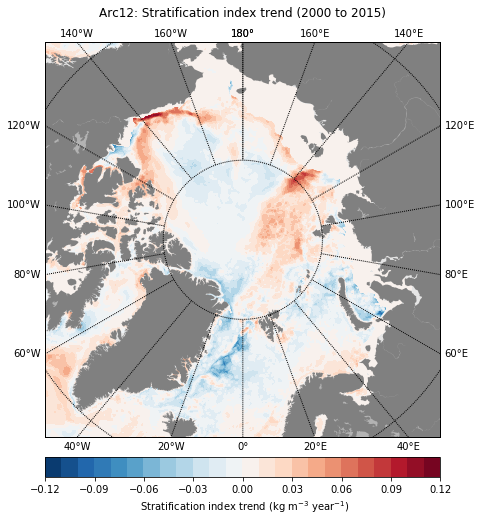

In [14]:
contours = [-0.12, 0.12, 0.01]
contours = np.arange(contours[0], contours[1]+contours[2], contours[2])
fig = plt.figure(figsize=(8,8), facecolor='w', edgecolor='k')
elem2=mesh.elem[mesh.no_cyclic_elem,:]
d=data2[elem2].mean(axis=1)
k = [i for (i, val) in enumerate(d) if not np.isnan(val)]
elem2=elem2[k,:]
print 'ftriplot, number of dummy points:', len(d)-len(k)		
map = Basemap(projection='nplaea',boundinglat=65,lon_0=0,resolution='l')
x, y = map(mesh.x2, mesh.y2)
#map.drawcoastlines()
plabels=[False,False,False,False]
mlabels=[True,True,True,True]    
map.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
map.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
map.drawmapboundary(fill_color='0.9')
map.fillcontinents(color='.5',lake_color='.7')
eps=(contours.max()-contours.min())/100.
data2[data2<=contours.min()]=contours.min()+eps
data2[data2>=contours.max()]=contours.max()-eps
im=plt.tricontourf(x, y, elem2, data2, levels=contours, cmap=cmap, norm=PiecewiseNorm(contours))
label = runid+': Stratification index trend ('+str(years[0])+' to '+str(years[len(years)-1])+')'
plt.title(label,y=1.05)
cbar=map.colorbar(im,"bottom", size="5%", pad="5%")
cbar.set_label(r' Stratification index trend (kg m$^{-3}$ year$^{-1}$)')
    
if export_plot == True:
        plt.savefig(savepath+'STRATspatial_trend_'+str(years[0])+'_'+str(years[-1])+'.png', dpi = dpicnt, bbox_inches='tight') 

plt.show() 